# Regularization Effects on Bias–Variance

This notebook demonstrates how regularization affects model behavior
in variance-dominated regimes using controlled experiments.

The goal is to observe how constraining model parameters stabilizes
generalization, not to optimize performance or tune hyperparameters.

## Scope

- Same data-generating process as the bias–variance overview
- Fixed high-complexity model
- Controlled variation of regularization strength
- Diagnostics via training and validation error

## Out of scope

- Hyperparameter search automation
- Cross-validation
- Structural model changes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

plt.style.use("default")

In [2]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Data-generating process

The same non-linear data-generating process is reused
to isolate the effect of regularization from changes in data or model structure.

In [3]:
n_samples = 200

X = np.linspace(0, 10, n_samples).reshape(-1, 1)
noise = np.random.normal(0.0, 1.0, size=n_samples)

y = (
    0.5 * X.squeeze() ** 2
    + 1.0 * X.squeeze()
    + 5.0
    + noise
)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

## High-complexity model setup

A high-degree polynomial is used to induce a variance-dominated regime.
Regularization strength is varied while the model structure remains fixed.

Polynomial features are standardized to avoid numerical instability
and isolate the effect of regularization.

In [5]:
degree = 10
poly = PolynomialFeatures(degree=degree, include_bias=False)

scaler = StandardScaler()

X_train_poly = poly.fit_transform(X_train)
X_train_poly = scaler.fit_transform(X_train_poly)

X_val_poly = poly.transform(X_val)
X_val_poly = scaler.transform(X_val_poly)

In [6]:
alphas = np.logspace(-3, 3, 20)

train_errors = []
val_errors = []

In [7]:
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

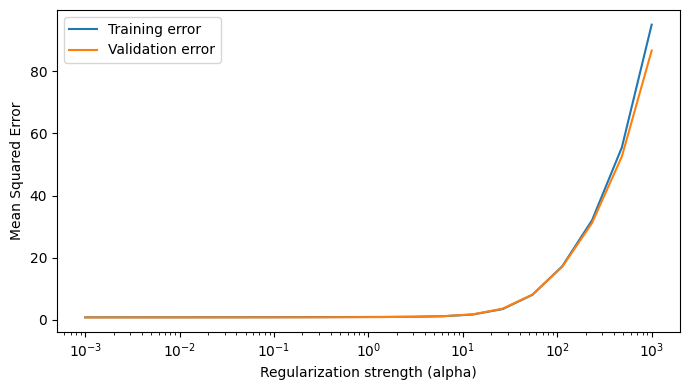

In [8]:
plt.figure(figsize=(7, 4))
plt.semilogx(alphas, train_errors, label="Training error")
plt.semilogx(alphas, val_errors, label="Validation error")
plt.xlabel("Regularization strength (alpha)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.tight_layout()
plt.show()

## Interpretation

With very low regularization strength, the model achieves low training error
but exhibits high validation error, indicating a variance-dominated regime.

As regularization strength increases, validation error decreases
while training error increases moderately, reflecting improved generalization.

At very high regularization strength, both training and validation error increase,
indicating a bias-dominated regime caused by excessive constraint.

## Takeaway

Regularization stabilizes generalization by reducing variance
at the cost of increased bias.

It is effective only when the underlying model class is appropriate.
Regularization cannot correct structural mis-specification;
it can only constrain an already valid model.

This experiment shows that regularization is a control mechanism,
not a substitute for model selection or feature design.